In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [7]:
import pandas as pd
df = pd.DataFrame()
df['X'] = X.reshape(100)
df['y'] = y

In [8]:
df.head(2)

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480


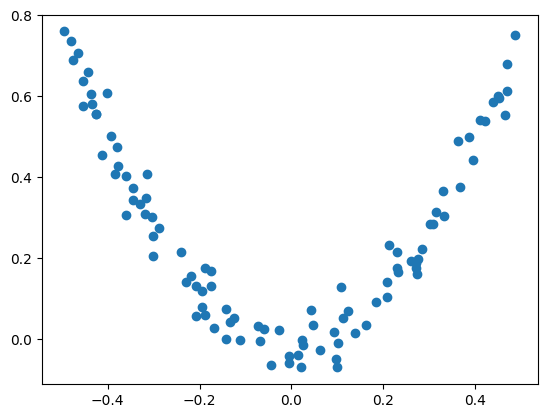

In [9]:
plt.scatter(df['X'],df['y'])

## First Model - Simple - Mean

In [10]:
#First Prediction
df['pred1'] = df['y'].mean()

In [11]:
df.head(2)

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458


In [12]:
#First Residual
df['res1'] = df['y'] - df['pred1']

In [13]:
df.head(2)

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021


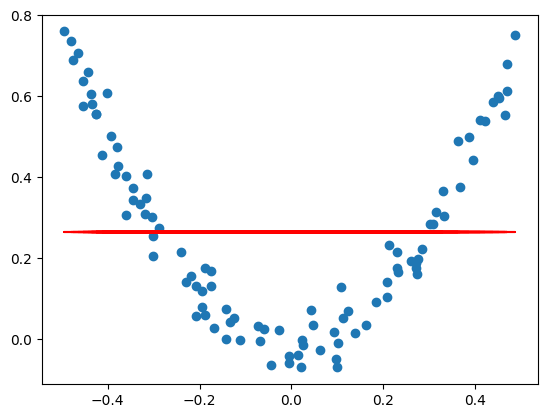

In [14]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

## Second model to nth model will be DecisionTrees

In [17]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_leaf_nodes=8)
dtr.fit(df['X'].values.reshape(-1,1),df['res1'].values)


DecisionTreeRegressor(max_leaf_nodes=8)

[Text(0.4090909090909091, 0.9166666666666666, 'x[0] <= -0.36\nsquared_error = 0.056\nsamples = 100\nvalue = 0.0'),
 Text(0.18181818181818182, 0.75, 'x[0] <= -0.43\nsquared_error = 0.012\nsamples = 18\nvalue = 0.309'),
 Text(0.29545454545454547, 0.8333333333333333, 'True  '),
 Text(0.09090909090909091, 0.5833333333333334, 'squared_error = 0.004\nsamples = 9\nvalue = 0.395'),
 Text(0.2727272727272727, 0.5833333333333334, 'squared_error = 0.005\nsamples = 9\nvalue = 0.222'),
 Text(0.6363636363636364, 0.75, 'x[0] <= 0.322\nsquared_error = 0.04\nsamples = 82\nvalue = -0.068'),
 Text(0.5227272727272727, 0.8333333333333333, '  False'),
 Text(0.45454545454545453, 0.5833333333333334, 'x[0] <= -0.235\nsquared_error = 0.016\nsamples = 67\nvalue = -0.142'),
 Text(0.36363636363636365, 0.4166666666666667, 'squared_error = 0.003\nsamples = 12\nvalue = 0.041'),
 Text(0.5454545454545454, 0.4166666666666667, 'x[0] <= 0.211\nsquared_error = 0.009\nsamples = 55\nvalue = -0.182'),
 Text(0.45454545454545453

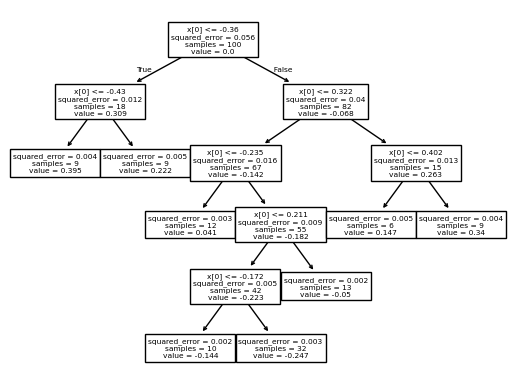

In [20]:
from sklearn.tree import plot_tree
plot_tree(dtr)

In [18]:
#Generating X_test
X_test = np.linspace(-0.5,0.5,500).reshape(-1,1)

In [22]:
#Output of f1(x) = output of f0(x) + dtree output
y_pred = df['pred1'].mean() + dtr.predict(X_test)

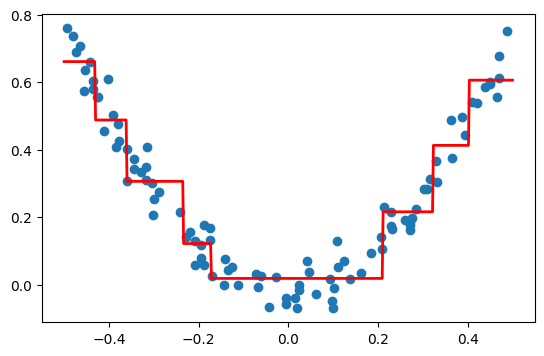

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [25]:
df['pred2'] = df['pred1'].mean() + dtr.predict(df['X'].values.reshape(-1,1))

In [26]:
df.head(2)

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320
1,0.450714,0.594480,0.265458,0.329021,0.605884


In [28]:
#Calculating residuals
df['res2'] = df['y'] - df['pred2']

In [29]:
df.head(2)

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320,0.033253
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404


## Third Model is Second Decision Tree

In [40]:
dtr2 = DecisionTreeRegressor(max_leaf_nodes=8)
dtr2.fit(df['X'].values.reshape(-1,1),df['res2'])

DecisionTreeRegressor(max_leaf_nodes=8)

In [41]:
y_pred1 = 0.265458 + sum(i.predict(X_test.reshape(-1, 1)) for i in [dtr,dtr2])

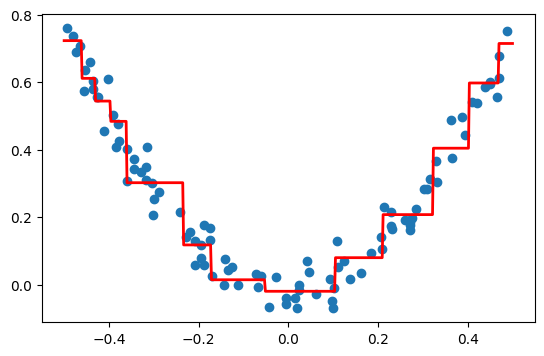

In [42]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred1, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])